# Sample Take Home Assignment
https://towardsdatascience.com/sample-take-home-coding-exercise-for-a-data-scientist-position-8086dd195a76

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,9)

Directions:
1. Read the file and display columns.
2. Calculate basic statistics of the data (count, mean, std, etc) and examine data and state your observations.
3. Select columns that will be probably important to predict “crew” size.
4. If you removed columns explain why you removed those.
5. Use one-hot encoding for categorical features.
6. Create training and testing sets (use 60% of the data for the training and reminder for testing).
7. Build a machine learning model to predict the ‘crew’ size.
8. Calculate the Pearson correlation coefficient for the training set and testing data sets.
9. Describe hyper-parameters in your model and how you would change them to improve the performance of the model.
10.What is regularization? What is the regularization parameter in your model?
11.Plot regularization parameter value vs Pearson correlation for the test and training sets, and see whether your model has bias problem or variance problem.

### 1. Read the file and display columns

In [202]:
df = pd.read_csv('data.txt')
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


### 2. Calculate basic statistics of the data (count, mean, std, etc) and examine data and state your observations

In [203]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,158.0,15.689873,7.615691,4.000,10.0000,14.000,20.0000,48.00
Tonnage,158.0,71.284671,37.229540,2.329,46.0130,71.899,90.7725,220.00
passengers,158.0,18.457405,9.677095,0.660,12.5350,19.500,24.8450,54.00
length,158.0,8.130633,1.793474,2.790,7.1000,8.555,9.5100,11.82
cabins,158.0,8.830000,4.471417,0.330,6.1325,9.570,10.8850,27.00
passenger_density,158.0,39.900949,8.639217,17.700,34.5700,39.085,44.1850,71.43
crew,158.0,7.794177,3.503487,0.590,5.4800,8.150,9.9900,21.00


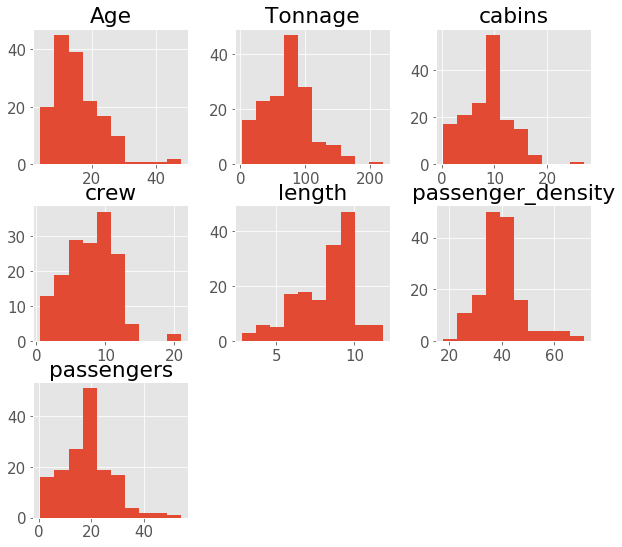

In [204]:
df.hist(bins=10);

### 3. Select columns that will be probably important to predict “crew” size

I am thinking anything that would do with the size of the ship and maybe passenger density

### 4. If you removed columns explain why you removed those

I will remove age only because age may have something to do with price and not crew size

### 5. Use one-hot encoding for categorical features

In [205]:
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [206]:
df_full = pd.concat([df, pd.get_dummies(df['Ship_name'])], axis=1)
df_full = pd.concat([df, pd.get_dummies(df['Cruise_line'])], axis=1)

In [207]:
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


### 6. Create training and testing sets (use 60% of the data for the training and reminder for testing) 

In [208]:
X = df.drop(columns=['Ship_name', 'Cruise_line', 'Age', 'crew'], axis =1)
y = df.crew

In [209]:
X

,Tonnage,passengers,length,cabins,passenger_density
0,30.277,6.94,5.94,3.55,42.64
1,30.277,6.94,5.94,3.55,42.64
2,47.262,14.86,7.22,7.43,31.80
3,110.000,29.74,9.53,14.88,36.99
4,101.353,26.42,8.92,13.21,38.36
...,...,...,...,...,...
153,3.341,0.66,2.79,0.33,50.62
154,76.800,19.60,8.79,9.67,39.18
155,5.350,1.58,4.40,0.74,33.86
156,5.350,1.67,4.40,0.74,32.04


In [210]:
y

0       3.55
1       3.55
2       6.70
3      19.10
4      10.00
       ...  
153     0.59
154    12.00
155     0.88
156     0.88
157     1.80
Name: crew, Length: 158, dtype: float64

In [211]:
from sklearn.model_selection import train_test_split

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X
                                                    , y
                                                    , test_size = 0.4
                                                    , random_state = 42
                                                   )

In [213]:
len(X_train), len(y_train)

(94, 94)

In [214]:
len(X_test), len(y_test)

(64, 64)

In [215]:
94 + 64

158

### 7. Build a machine learning model to predict the ‘crew’ size

In [216]:
from sklearn.ensemble import RandomForestRegressor

In [218]:
rfr = RandomForestRegressor(n_estimators = 5
                            , max_depth = 5
                            , max_features = 5
                            , random_state = 42
                           )

rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features=5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [219]:
y_pred = rfr.predict(X_test)

In [221]:
(X_train.columns)[np.argsort(rfr.feature_importances_)[-5:]][::-1]

Index(['cabins', 'length', 'Tonnage', 'passengers', 'passenger_density'], dtype='object')

In [222]:
len(X_train.columns)

5

In [223]:
np.argmax(rfr.feature_importances_)

3

In [224]:
X_train.columns[3]

'cabins'

In [225]:
rfr.score(X_test, y_test)

0.8148767885209873

In [226]:
from sklearn.model_selection import cross_val_score

In [227]:
scores = cross_val_score(rfr, X, y, cv=5)
scores

array([0.51478992, 0.76770838, 0.82103228, 0.82903022, 0.85094015])

### 8. Calculate the Pearson correlation coefficient for the training set and testing data sets

In [228]:
X_train.corr()

,Tonnage,passengers,length,cabins,passenger_density
Tonnage,1.000000,0.933508,0.938135,0.944813,-0.126416
passengers,0.933508,1.000000,0.889615,0.982828,-0.404539
length,0.938135,0.889615,1.000000,0.907111,-0.178098
cabins,0.944813,0.982828,0.907111,1.000000,-0.381106
passenger_density,-0.126416,-0.404539,-0.178098,-0.381106,1.000000


In [229]:
X_test.corr()

,Tonnage,passengers,length,cabins,passenger_density
Tonnage,1.000000,0.957292,0.903531,0.952810,0.096448
passengers,0.957292,1.000000,0.871567,0.967937,-0.123738
length,0.903531,0.871567,1.000000,0.865107,0.061497
cabins,0.952810,0.967937,0.865107,1.000000,-0.057813
passenger_density,0.096448,-0.123738,0.061497,-0.057813,1.000000


In [230]:
import seaborn as sns

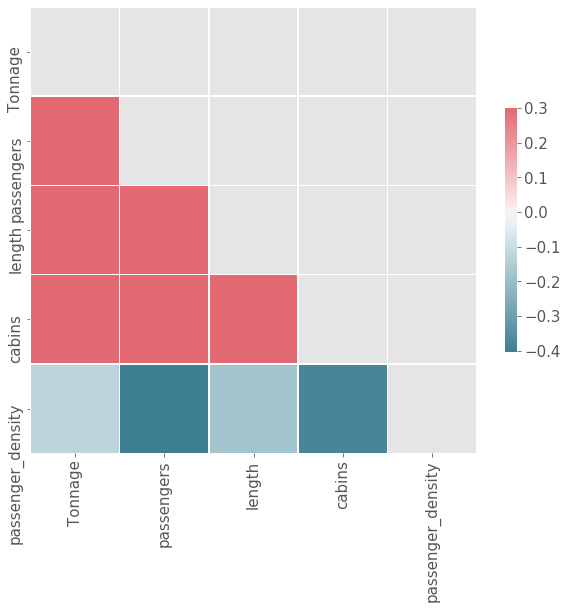

In [231]:
corr_train = X_train.corr()
corr_test = X_test.corr()
mask = np.triu(np.ones_like(corr_train, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_train
           , mask=mask
           , cmap=cmap
           , vmax=0.3
           , center=0
           , square=True
           , linewidths=0.5
           , cbar_kws={'shrink': 0.5}
          )